In [4]:
from asyncio.windows_events import NULL
from cmath import nan
from math import floor
import pymongo
import sys
import os
import pandas as pd
#import pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [7]:

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mynewdb = myclient["playstore_database"]
dataset = mynewdb["playstore1"]

In [3]:

uni_qenre=dataset.aggregate(
[
    {
        '$project': {
            'genre': '$genre'
        }
    }, {
        '$group': {
            '_id': '$genre'
        }
    }
]
)
#unique genre
uni_gen1=[]
leading_company=[]
for i in uni_qenre:
    for key,value in i.items():
        uni_gen1.append(value)
        #print(key,":",value)
#print(uni_gen1)
print("\n--------leading Company in specific genre---------")
#leading company
abcs=1
for i in range(0,len(uni_gen1)):
    abcs=abcs+1
    result_1=dataset.aggregate(
        [
    {
        '$match': {
            'genre': uni_gen1[i]
        }
    }, {
        '$project': {
            '_id': '$offered_by', 
            'Game': '$app_name',
            'Genre': '$genre',  
            'maxInstalls': {
                '$max': '$installs'
            }, 
            'max5StarRate': {
                '$max': '$rate_5_pc'
            }, 
            'maxAppPurchase': {
                '$max': '$in_app_products'
            }
        }
    }, {
        '$sort': {
            'maxInstalls': -1
        }
    }, {
        '$limit': 1
    }
])

    for i in result_1:
        res1={}
#        print("------------------------------------------------")
        for key, value in i.items():
            res1[key]=value
#            print(key,":", value)
#        print("------------------------------------------------")
        leading_company.append(res1)

   
    #print(abcs)

#print leading Company
print("-------------------------------------------------------")
print("{:<8} {:<30} {:<10}".format("SR.No",'Genre','Company Name'))
print("-------------------------------------------------------")
for i in range(0,len(leading_company)):
    #print("-------------------------------------------------------")
    #print(i+1,")","In ",leading_company[i]['Genre'],leading_company[i]['_id'],"company is leading!")
    print("{:<8} {:<30} {:<10}".format(i+1,leading_company[i]['Genre'],leading_company[i]['_id']))
    #print("------------------------------------------------")




--------leading Company in specific genre---------
-------------------------------------------------------
SR.No    Genre                          Company Name
-------------------------------------------------------
1        Entertainment                  Google LLC
2        Music                          AMANOTES  
3        Strategy                       ELECTRONIC ARTS
4        Art & Design                   Canva     
5        Travel & Local                 Google LLC
6        Books & Reference              Google LLC
7        Adventure                      Pretty Simple
8        Social                         Facebook  
9        Word                           Great Puzzle Games
10       Trivia                         Etermax   
11       House & Home                   CodeMatics Media Solutions
12       Music & Audio                  Google LLC
13       Shopping                       Alibaba Mobile
14       Racing                         Fingersoft
15       Video Players & Editors 

In [4]:

print("\n-------------Heighest company based on Age-------------")
#for a defined age which company is highest
ageCompany=dataset.aggregate(
[
    {
        '$group': {
            '_id': '$content_rating', 
            'offered_by': {
                '$max': '$offered_by'
            }, 
            'genre': {
                '$max': '$genre'
            }, 
            'maxPurchase': {
                '$sum': '$in_app_products'
            }
        }
    }, {
        '$match': {
            '_id': {
                '$nin': [
                    nan
                ]
            }
        }
    }, {
        '$sort': {
            '_id': -1
        }
    }
]
)
#giveAge=input("Enter the Age : ")
#print("you entered age is ",giveAge)

nestedDict=[]
for i in ageCompany:
    res1={}
    for key, value in i.items():
        res1[key]=value
    nestedDict.append(i)

givenAge=int(input("Enter the Age : "))
#print("you entered age is ",giveAge)
if givenAge<7:
    print("For age",givenAge,"highest earning company is ",nestedDict[4]['offered_by'],
",its genre is",nestedDict[4]['genre'],"and having Max Purchase of ",
nestedDict[4]['maxPurchase'],"USD.")
elif givenAge>=7 and givenAge<12:
    print("For age",givenAge,
    "highest earning company is ",nestedDict[3]['offered_by'],
    ",its genre is",nestedDict[3]['genre'],
    "and having Max Purchase of ",nestedDict[3]['maxPurchase'],"USD.")
elif givenAge>=12 and givenAge<16:
    print("For age",givenAge,
    "highest earning company is ",nestedDict[2]['offered_by'],
    ",its genre is",nestedDict[2]['genre'],
    "and having Max Purchase of ",nestedDict[2]['maxPurchase'],"USD.")
elif givenAge>=16 and givenAge<18:
    print("For age",givenAge,
    "highest earning company is ",nestedDict[1]['offered_by'],
    ",its genre is",nestedDict[1]['genre'],
    "and having Max Purchase of ",nestedDict[1]['maxPurchase'],"USD.")
elif givenAge>=18:
    #print(nestedDict[0])
    print("For age",givenAge,
    "highest earning company is ",nestedDict[0]['offered_by'],
    ",its genre is",nestedDict[0]['genre'],
    "and having Max Purchase of ",nestedDict[0]['maxPurchase'],"USD.")



-------------Heighest company based on Age-------------
For age 2 highest earning company is  🥇Alot.pro ,its genre is Word and having Max Purchase of  882242291 USD.


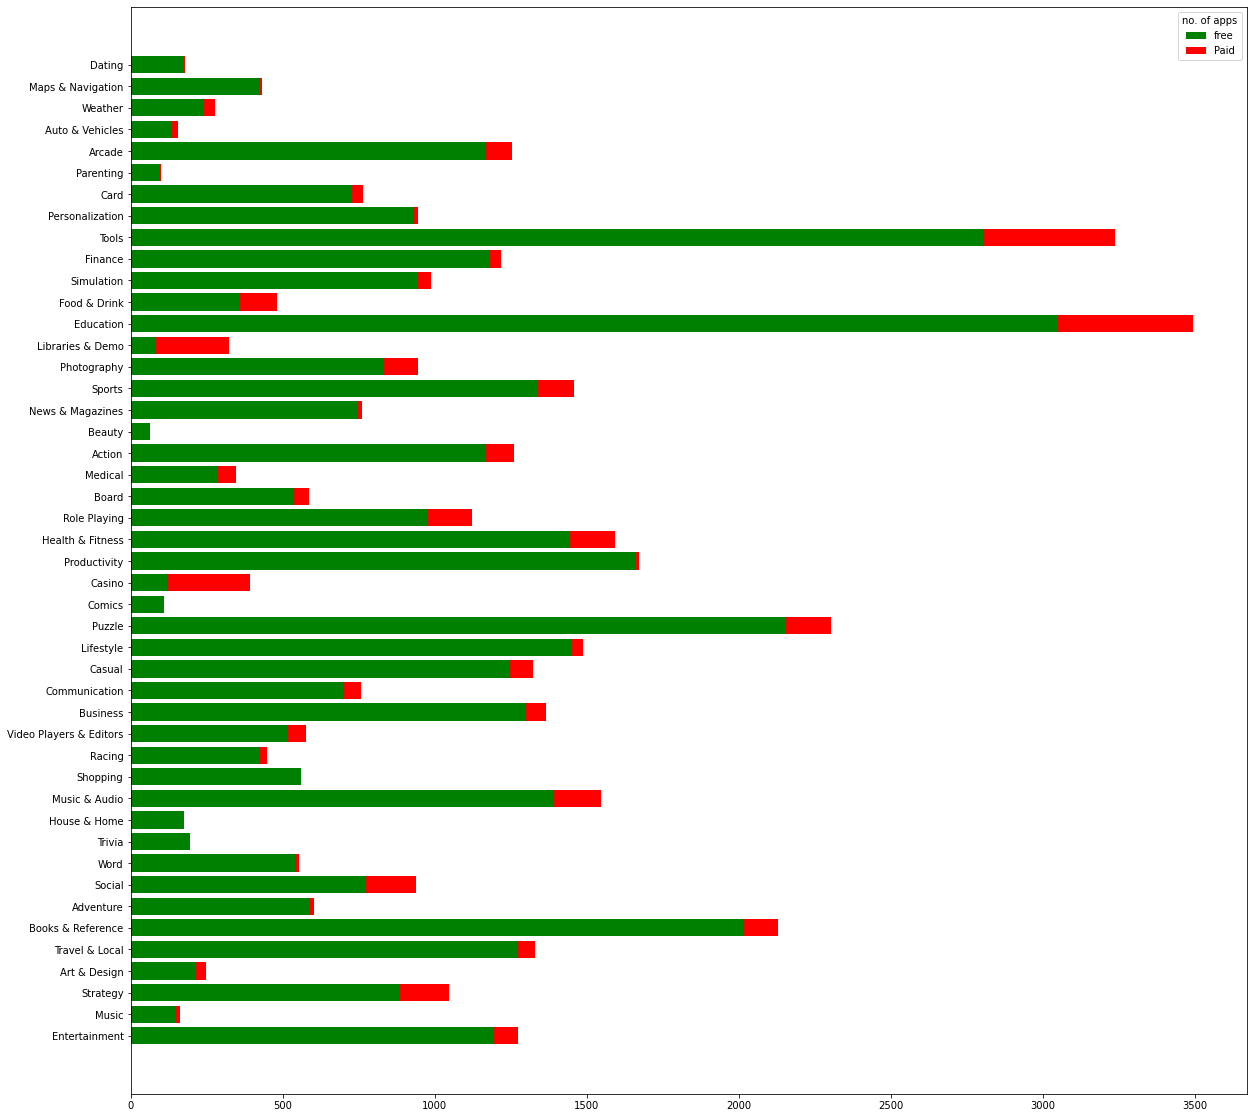

In [6]:
free_app=dataset.aggregate(
[
    {
        '$match': {
            'cost_label': {
                '$in': [
                    'Free'
                ]
            }
        }
    },
    {
        '$match': {
            'genre': {
                '$nin': [
                    'Events'
                ]
            }
        }
    }, {
        '$group': {
            '_id': '$genre', 
            'count': {
                '$sum': 1
            }
        }
    }, {
        '$sort': {
            'genre': -1
        }
    }
])
genre_name = []
freePaid_count = []
for x in free_app:
    for key, value in x.items():
        #print(key, ":", value)
        if key== '_id':
            genre_name.append(value)
        else:
            freePaid_count.append(value)
    
totalRow=dataset.aggregate(
    [
    {
        '$match': {
            'cost_label': {
                '$nin': [
                    'Free'
                ]
            }
        }
    }, {
        '$group': {
            '_id': '$genre', 
            'count': {
                '$sum': 1
            }
        }
    }, {
        '$sort': {
            'genre': -1
        }
    }
])
genre_name1 = []
freePaid_count1 = []
for i in totalRow:
    for key, value in i.items():
        #print(key, ":", value)
        if key== '_id':
            genre_name1.append(value)
        else:
            freePaid_count1.append(value)
plt.rcParams["figure.figsize"] = (20,20)
b1 = plt.barh(genre_name, freePaid_count, color="green")
b2 = plt.barh(genre_name, freePaid_count1, left=freePaid_count, color="red")
plt.legend([b1, b2], ["free", "Paid"], title="no. of apps", )
plt.show()

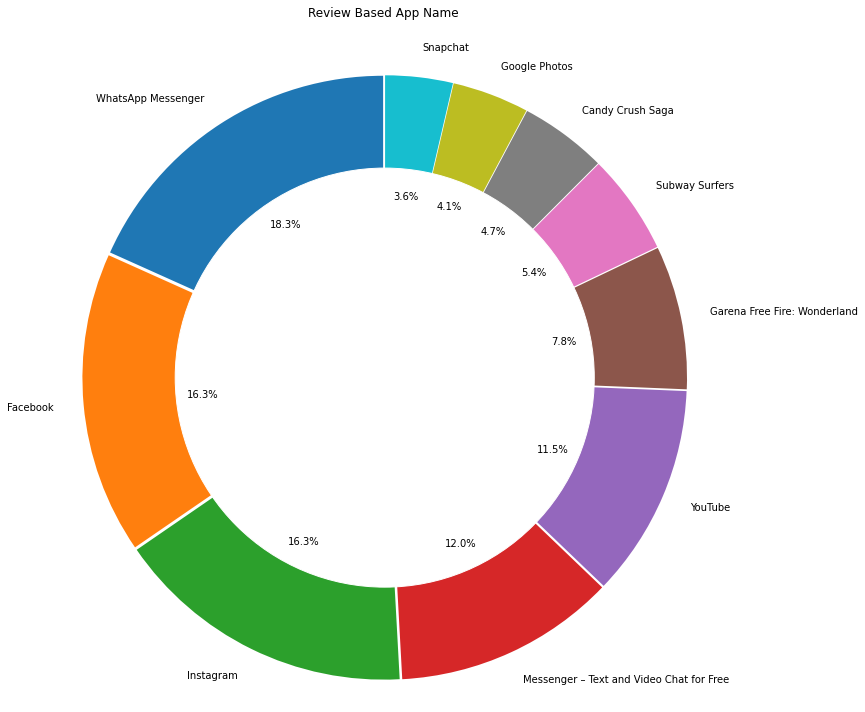

In [7]:

#print("\n-------------Review based Rating-------------")
#reviewBasedRating
reviewBasedRating=dataset.aggregate(
    [
    {
        '$group': {
            '_id': '$reviews', 
            'rate_5_pc': {
                '$max': '$rate_5_pc'
            }, 
            'genre': {
                '$max': '$genre'
            }, 
            'app_name': {
                '$max': '$app_name'
            }
        }
    }, {
        '$sort': {
            '_id': -1
        }
    }, {
        '$limit': 10
    }
]
)
reviewbasedList=[]
reviewList=[]
appNameList=[]
for i in reviewBasedRating:
    obj={}
   #print("----------------------------------")
    for key,value in i.items():
        if key == "_id":
            key = "reviews"
        #print(key,":",value)
        if key == "reviews":
            key = "_id" 
        obj[key]=value
    #print("----------------------------------")
    reviewbasedList.append(obj)
for i in range(0,len(reviewbasedList)):
    reviewList.append(reviewbasedList[i]['_id'])
    appNameList.append(reviewbasedList[i]['app_name'])

#piegraph on reviews
fig = plt.gcf()
fig.set_facecolor("white")
fig.set_size_inches(12,12)
plt.pie(reviewList, labels=appNameList, autopct='%1.1f%%', explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01], startangle=90, textprops={'color':"black"})
plt.title('Review Based App Name\n\n')
plt.axis('equal')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()



In [35]:
print("-------------Idle Case For Developer-------------")
#idleCase for app developer
idleCase=dataset.aggregate(
 [
    {
        '$group': {
            '_id': '$genre', 
            'maxDow': {
                '$max': '$installs'
            }, 
            'maxRev': {
                '$max': '$reviews'
            }, 
            'maxRat': {
                '$max': '$rating'
            }, 
            'minADvs': {
                '$avg': '$requires_android'
            }, 
            'minInAppPrd': {
                '$avg': '$in_app_products'
            }, 
            'minSize': {
                '$avg': '$size_mb'
            }
        }
    }, {
        '$sort': {
            'maxRev': -1, 
            'maxDow': -1, 
            'maxRat': -1
        }
    }
]
    #{
    #    '$limit': 10
    #}

)
idleCaseList=[]
for i in idleCase:
    obj={}
    for key,value in i.items():
        obj[key]=value
    idleCaseList.append(obj)
#print(idleCaseList)

for i in range(0,len(idleCaseList)):
    print(i+1,"",idleCaseList[i]['_id'])

#print(idleCaseList[0]['_id']) #to acess nested list element


-------------Idle Case For Developer-------------
1  Communication
2  Social
3  Video Players & Editors
4  Action
5  Arcade
6  Casual
7  Photography
8  Sports
9  Music & Audio
10  Tools
11  News & Magazines
12  Adventure
13  Travel & Local
14  Entertainment
15  Racing
16  Shopping
17  Education
18  Personalization
19  Maps & Navigation
20  Simulation
21  Trivia
22  Lifestyle
23  Finance
24  Health & Fitness
25  Productivity
26  Strategy
27  Board
28  Puzzle
29  Books & Reference
30  Role Playing
31  Weather
32  Casino
33  Art & Design
34  Food & Drink
35  Word
36  Business
37  Card
38  Music
39  Comics
40  Beauty
41  Dating
42  Libraries & Demo
43  House & Home
44  Auto & Vehicles
45  Medical
46  Parenting
47  Events



--------Idle condition for app development in Finance genre---------------------
The Android version for this genre must be near to  4.5 ,
The app size must be around  27 mb,
The  app can have an around  18528 in app products. 
Such an app can reach  100000000 download and gain  5442470 reviews with a average rating of  5  stars!
------------------------------------------------------------------------------------------


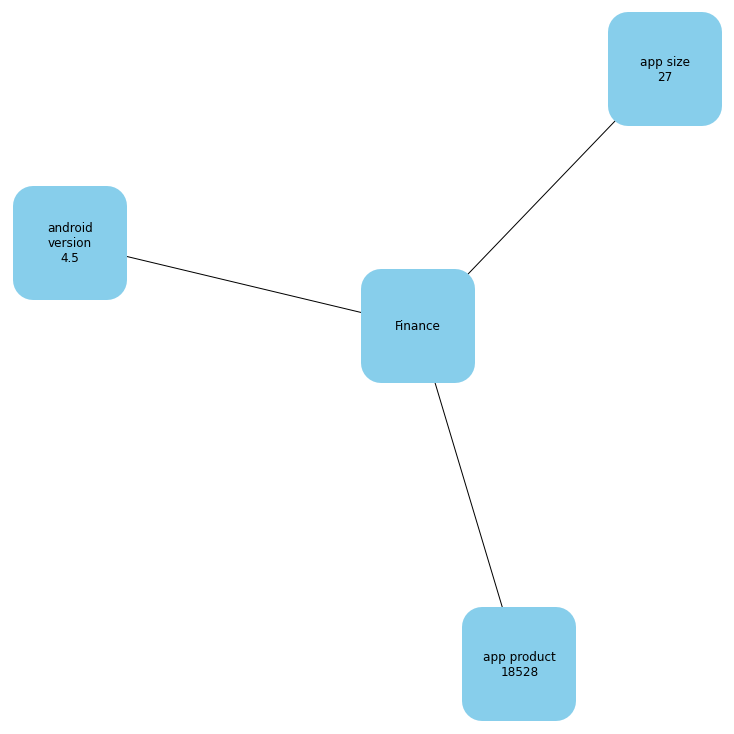

In [34]:
b=int(input("Enter the number to select the genre : "))
if b>len(idleCaseList) or b<=0:
    print("Enter a Valid input within range!")
else:
    print("\n--------Idle condition for app development in",idleCaseList[b-1]['_id'],"genre---------------------")
    print(
    "The Android version for this genre must be near to ",round(idleCaseList[b-1]['minADvs'],1),
    ",\nThe app size must be around ",floor(idleCaseList[b-1]['minSize']),
    "mb,\nThe  app can have an around ",floor(idleCaseList[b-1]['minInAppPrd']),
    "in app products. \nSuch an app can reach ",idleCaseList[b-1]['maxDow'],
    "download and gain ",idleCaseList[b-1]['maxRev'],
    "reviews with a average rating of ",idleCaseList[b-1]['maxRat']," stars!" )
    print("------------------------------------------------------------------------------------------")

    a1=f"android\nversion\n{round(idleCaseList[b-1]['minADvs'],1)}"
    a2=f"app size\n{floor(idleCaseList[b-1]['minSize'])}"
    a3=f"app product\n{floor(idleCaseList[b-1]['minInAppPrd'])}"

    df = pd.DataFrame({ 'from':[idleCaseList[b-1]['_id'],idleCaseList[b-1]['_id'],idleCaseList[b-1]['_id']],'to':[a1,a2,a3]})
    G=nx.from_pandas_edgelist(df, 'from', 'to')

    # Plot it
    nx.draw(G, with_labels=True,node_size=5500, node_color="skyblue", node_shape="s", alpha=1, linewidths=40)
    fig = plt.gcf()
    fig.set_facecolor("white")
    fig.set_size_inches(10,10)
    plt.show()

In [13]:

print("------------------------Max Download for highest paid section-------------------------------")
#Max Download for highest paid section
mdfhps=dataset.aggregate(
   [
    {
        '$match': {
            'cost_label': {
                '$ne': 'Free'
            }
        }
    }, {
        '$group': {
            '_id': '$genre', 
            'installs_count': {
                '$sum': '$installs'
            }, 
            'in_app_products_count': {
                '$sum': '$in_app_products'
            }, 
            'count': {
                '$sum': 1
            }
        }
    }, {
        '$sort': {
            'count': -1
        }
    }, {
        '$limit': 1
    }
]
)
mdList=[]
for i in mdfhps:
    obj={}
    for key,value in i.items():
        obj[key]=value
    mdList.append(obj)

for i in range(0,len(mdList)):
    print("Genre",mdList[i]['_id'],"has the maximum download of",mdList[i]['installs_count'],"for the heighest paid section i.e In app purchase is",
    mdList[i]['in_app_products_count'],"USD!")



------------------------Max Download for highest paid section-------------------------------
Genre Personalization has the maximum download of 4142210 for the heighest paid section i.e In app purchase is 4028497 USD!


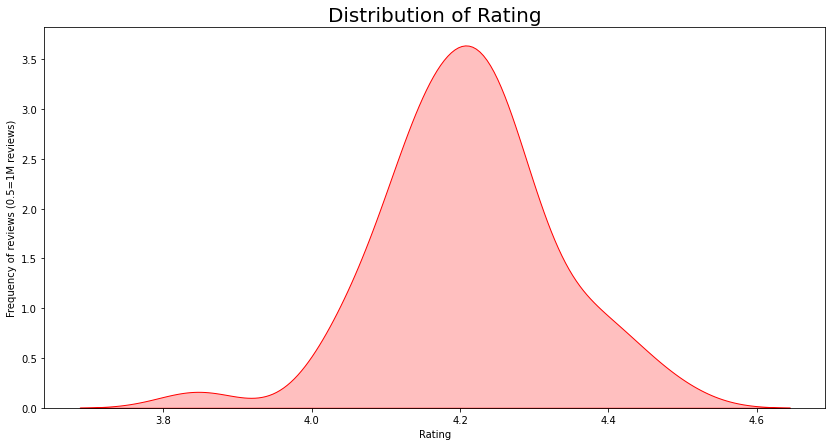

In [14]:

result_1=dataset.aggregate([ 
    {
        '$group': {
            '_id': '$genre', 
            'rating_sum': {
                '$sum': '$rating'
            }, 
            'rating_count': {
                '$sum': 1
            }
        }
    }, {
        '$project': {
            'rating_avg': {
                '$divide': [
                    '$rating_sum', '$rating_count'
                ]
            }
        }
    }

    ])

languages = []
languages_count = []
for x in result_1:
    for key, value in x.items():
        if key == '_id':
            languages.append(value)
        else:
            languages_count.append(float(value))


#print(languages_count)
s = pd.Series(languages_count)
#print(s.describe())
#languages_count['rating'].describe()

plt.figure(figsize=(14,7))
g=sns.kdeplot(s, color="Red", shade = True)
#set_xlabel("Rating")
#set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.xlabel("Rating")
plt.ylabel("Frequency of reviews (0.5=1M reviews)")
plt.show()

In [15]:
#which company work in which genre
uniCompany=dataset.aggregate(
    [
    {
        '$group': {
            '_id': '$offered_by', 
            'count': {
                '$max': '$installs'
            }
        }
    }, {
        '$sort': {
            'count': -1
        }
    }, 
    #{
     #   '$limit': 10
    #}
]
)
dist_company1=[]
dist_company=[]
for i in uniCompany:
    obj={}
    for key,value in i.items():
        obj[key]=value
    dist_company1.append(obj)
for i in range(0,len(dist_company1)):
    dist_company.append(dist_company1[i]['_id'])
#dist_company=['Google LLC','WhatsApp Inc.','Facebook','Samsung Electronics Co., Ltd.','Instagram']
for i in range(0,len(dist_company)):
    print(i+1," ",dist_company[i],"")


1   Google LLC 
2   WhatsApp Inc. 
3   Facebook 
4   Samsung Electronics Co., Ltd. 
5   Instagram 
6   King 
7   Snap Inc 
8   SHAREit Technologies Co.Ltd 
9   Microsoft Corporation 
10   SYBO Games 
11   Skype 
12   PicsArt 
13   Twitter, Inc. 
14   True Software Scandinavia AB 
15   GARENA INTERNATIONAL I PRIVATE LIMITED 
16   Uber Technologies, Inc. 
17   LINE Corporation 
18   imo.im 
19   Imangi Studios 
20   SwiftKey 
21   Viber Media S.à r.l. 
22   Spotify Ltd. 
23   Flipboard 
24   Netflix, Inc. 
25   MX Media & Entertainment (formerly J2 Interactive) 
26   UCWeb Singapore Pte. Ltd. 
27   SNOW, Inc. 
28   Adobe 
29   Fingersoft 
30   BIGO TECHNOLOGY PTE. LTD. 
31   LinkedIn 
32   Outfit7 Limited 
33   Dropbox, Inc. 
34   Zakeh 
35   Miniclip.com 
36   Sberbank of Russia 
37   KWAI 
38   SoundCloud 
39   Opera 
40   APUS Group 
41   Zalo Group 
42   Soner Kara 
43   Zedge 
44   Badoo 
45   FunDevs LLC 
46   Waze 
47   Safe Security Develop 
48   PayPal Mobile 
49   Grab Holdings

Selected Company :  WhatsApp Inc.


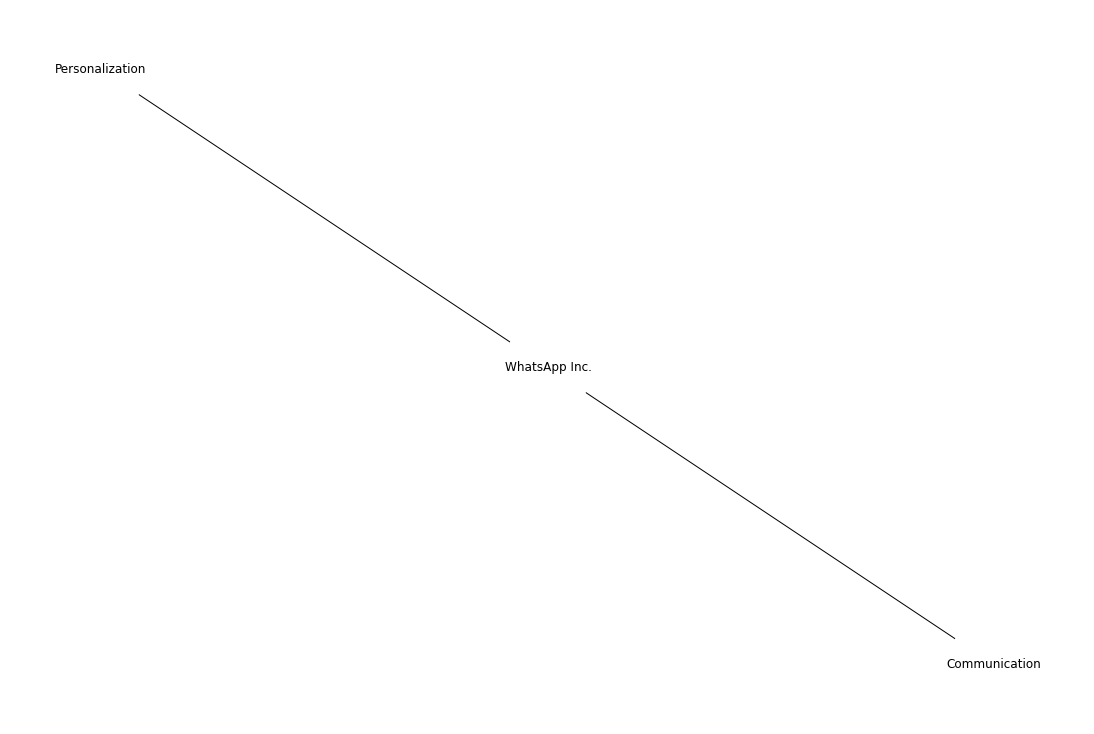

In [37]:
a=int(input("Enter the key to select the Company name : "))
if a>len(dist_company) or a<=0:
    print("Enter a vaild number between range!")
else:
    selectedCompany=dist_company[a-1]
    #for i in range(0,len(dist_company)):
    company_genre=dataset.aggregate(
        [
        {
            '$sort': {
                'installs': -1, 
                'rating': -1
            }
        }, {
            '$match': {
                'offered_by': selectedCompany
            }
        }, {
            '$group': {
                '_id': '$genre'
            }
        }
    ]
    )

    genreCount=[]
    companyGenre=[]
    copanyNameList=[]
    companyGenreList=[]
    count=1
    print("Selected Company : ",selectedCompany)
    for j in company_genre:
        obj={}
        for key,value in j.items():
            obj[key]=value
        companyGenre.append(obj)
        genreCount.append(count)
        copanyNameList.append(selectedCompany)
        count=count+1
    #print(companyGenre)
    #print(genreCount)
    for l in range(0,len(companyGenre)):
        companyGenreList.append(companyGenre[l]['_id'])

    for k in range(0,len(genreCount)):
        df = pd.DataFrame({ 'from':copanyNameList, 'to':companyGenreList})
        G=nx.from_pandas_edgelist(df, 'from', 'to')

    # Plot it
    nx.draw(G, with_labels=True,node_size=1500, node_color="white", node_shape="s", alpha=1, linewidths=40)
    fig = plt.gcf()
    fig.set_facecolor("white")
    fig.set_size_inches(15,10)
    plt.show()
